<a href="https://colab.research.google.com/github/vishal0820/ML-and-DL-Projects/blob/main/Youtube_2025_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


## Title: YouTube 2025 Dataset

#### Description:A comprehensive dataset capturing YouTube trends, video metadata, engagement metrics, and creator insights for the year 2025. Ideal for analysis of content strategies, audience behavior, and platform evolution.

### Import dataset

In [40]:
df = pd.read_csv('/content/youtube_2025_dataset_202504061614.csv')

In [41]:
df.head()

,Channel Name,Youtuber Name,Total Videos,Best Video,Avg Video Length (min),Total Subscribers,Members Count,AI Generated Content (%),Neural Interface Compatible,Metaverse Integration Level,Quantum Computing Topics,Holographic Content Rating,Engagement Score,Content Value Index
0,Smith-Ross Labs,Eric Patel,68,VR Challenge: Review 2023,24.8,8264152,303319,9,True,Full,5,3D,130655.44,6.2
1,Sandoval PLC Hub,Cynthia Harrington,128,Nanotech Simulation: Analysis 2024,22.9,8768222,384629,62,False,NaN,4,3D,138624.73,21.4
2,"Jones, Moore and Ho Network",Amanda Walker,282,Metaverse Interface: Analysis 2024,24.0,6163386,361743,31,True,Advanced,6,1D,97442.53,13.5
3,Mitchell-Hooper Labs,Jessica Nelson MD,302,VR Protocol: Review 2023,24.6,4712268,58483,5,False,NaN,15,1D,74500.50,12.0
4,Wilson LLC Studios,Matthew Sherman,129,Nanotech Simulation: Review 2024,24.6,9592017,333873,63,True,NaN,12,3D,151648.85,27.3


In [42]:
df.tail()

,Channel Name,Youtuber Name,Total Videos,Best Video,Avg Video Length (min),Total Subscribers,Members Count,AI Generated Content (%),Neural Interface Compatible,Metaverse Integration Level,Quantum Computing Topics,Holographic Content Rating,Engagement Score,Content Value Index
4995,Flores-Daniel Studios,Jasmine Smith,106,AI Challenge: Experience 2023,22.0,2665835,267828,19,True,Full,1,3D,42146.59,6.4
4996,Spencer and Sons Studios,John Rasmussen,130,VR Challenge: Analysis 2023,26.3,136992,20019,67,True,Full,14,4D,2165.83,29.9
4997,Obrien-Roberts Studios,Lisa Burke,179,AI Challenge: Experience 2023,25.2,2314561,407346,99,True,Advanced,5,1D,36592.98,33.2
4998,King Ltd Hub,Steve Diaz,182,VR Synthesis: Showcase 2023,24.5,6954832,308313,1,True,Basic,9,4D,109955.22,6.6
4999,Henry Ltd Studios,Austin Tate,92,AI Simulation: Showcase 2025,25.2,6785166,23263,52,True,Full,8,3D,107272.81,21.2


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Channel Name                 5000 non-null   object 
 1   Youtuber Name                5000 non-null   object 
 2   Total Videos                 5000 non-null   int64  
 3   Best Video                   5000 non-null   object 
 4   Avg Video Length (min)       5000 non-null   float64
 5   Total Subscribers            5000 non-null   int64  
 6   Members Count                5000 non-null   int64  
 7   AI Generated Content (%)     5000 non-null   int64  
 8   Neural Interface Compatible  5000 non-null   bool   
 9   Metaverse Integration Level  3718 non-null   object 
 10  Quantum Computing Topics     5000 non-null   int64  
 11  Holographic Content Rating   5000 non-null   object 
 12  Engagement Score             5000 non-null   float64
 13  Content Value Inde

In [44]:
df.describe()

,Total Videos,Avg Video Length (min),Total Subscribers,Members Count,AI Generated Content (%),Quantum Computing Topics,Engagement Score,Content Value Index
count,5000.00000,5000.000000,5.000000e+03,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,274.43340,24.004540,5.058482e+06,249082.01980,49.328600,10.061400,79974.100470,21.841560
std,131.71675,0.874555,2.890895e+06,143555.47327,29.444246,6.093953,45704.767088,9.863744
min,50.00000,19.100000,1.755000e+03,143.00000,0.000000,0.000000,27.750000,0.000000
25%,159.00000,23.500000,2.547991e+06,127000.75000,24.000000,5.000000,40283.490000,14.200000
50%,274.00000,24.000000,5.105967e+06,252320.50000,49.000000,10.000000,80724.840000,21.800000
75%,389.00000,24.500000,7.541903e+06,371419.25000,76.000000,15.000000,119236.752500,29.700000
max,500.00000,28.900000,9.999975e+06,499991.00000,100.000000,20.000000,158098.630000,44.000000


In [45]:
df.isnull().sum()

,0
Channel Name,0
Youtuber Name,0
Total Videos,0
Best Video,0
Avg Video Length (min),0
Total Subscribers,0
Members Count,0
AI Generated Content (%),0
Neural Interface Compatible,0
Metaverse Integration Level,1282


Only column--> Metaverse Integration Level has missing values

In [46]:
df.duplicated().sum()

np.int64(0)

In [47]:
df.shape

(5000, 14)

The dataset contains 5000 rows and 14 columns

In [48]:
df.dtypes

,0
Channel Name,object
Youtuber Name,object
Total Videos,int64
Best Video,object
Avg Video Length (min),float64
Total Subscribers,int64
Members Count,int64
AI Generated Content (%),int64
Neural Interface Compatible,bool
Metaverse Integration Level,object


In [49]:
df.columns

Index(['Channel Name', 'Youtuber Name', 'Total Videos', 'Best Video',
       'Avg Video Length (min)', 'Total Subscribers', 'Members Count',
       'AI Generated Content (%)', 'Neural Interface Compatible',
       'Metaverse Integration Level', 'Quantum Computing Topics',
       'Holographic Content Rating', 'Engagement Score',
       'Content Value Index'],
      dtype='object')

## Data visualizations

In [50]:
# Set style
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (10, 6)

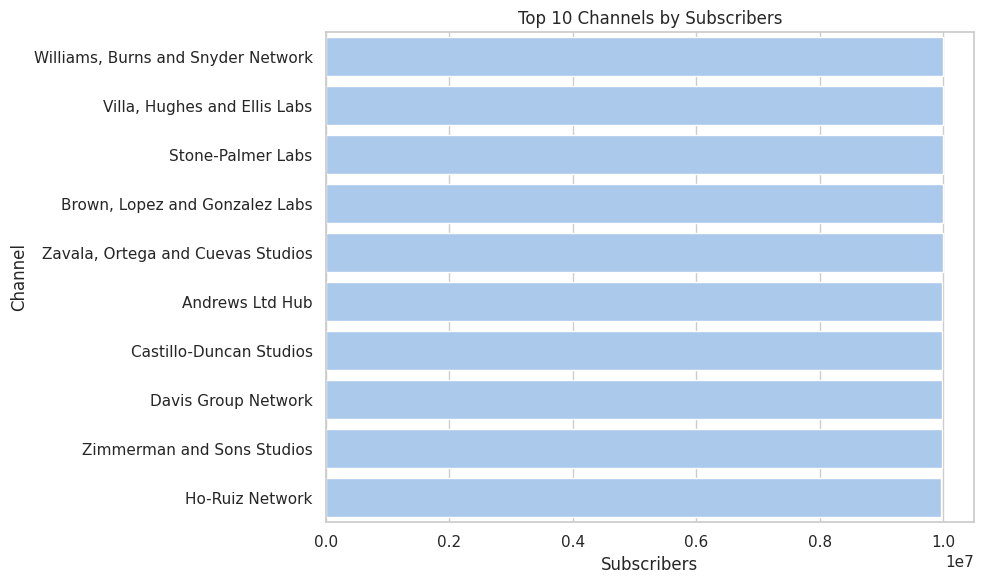

In [51]:
# Top 10 channels by subscribers
top_subs = df.nlargest(10, 'Total Subscribers')
sns.barplot(data=top_subs, y='Channel Name', x='Total Subscribers')
plt.title("Top 10 Channels by Subscribers")
plt.xlabel("Subscribers")
plt.ylabel("Channel")
plt.tight_layout()
plt.show()

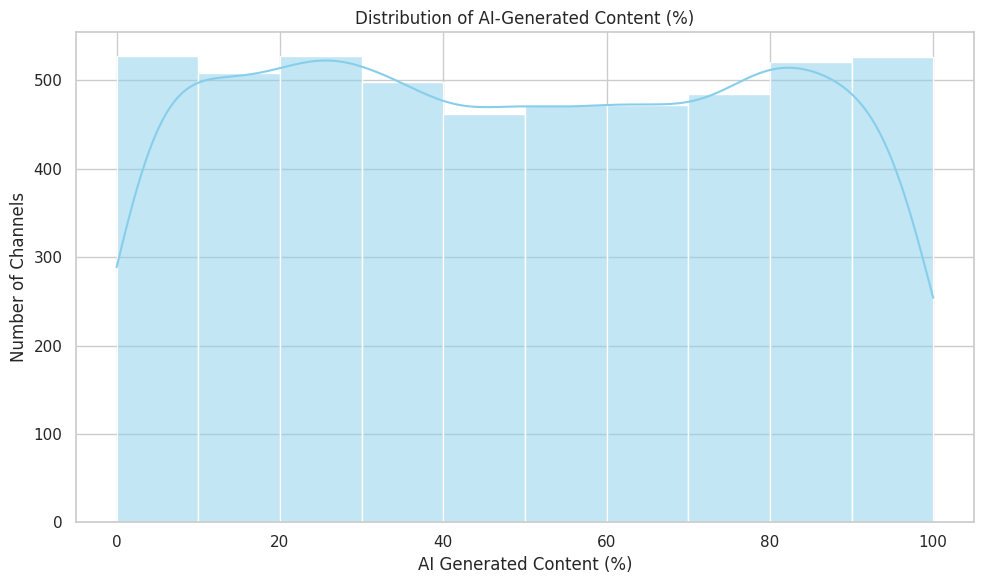

In [52]:
# Distribution of AI Generated Content
sns.histplot(df['AI Generated Content (%)'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of AI-Generated Content (%)")
plt.xlabel("AI Generated Content (%)")
plt.ylabel("Number of Channels")
plt.tight_layout()
plt.show()

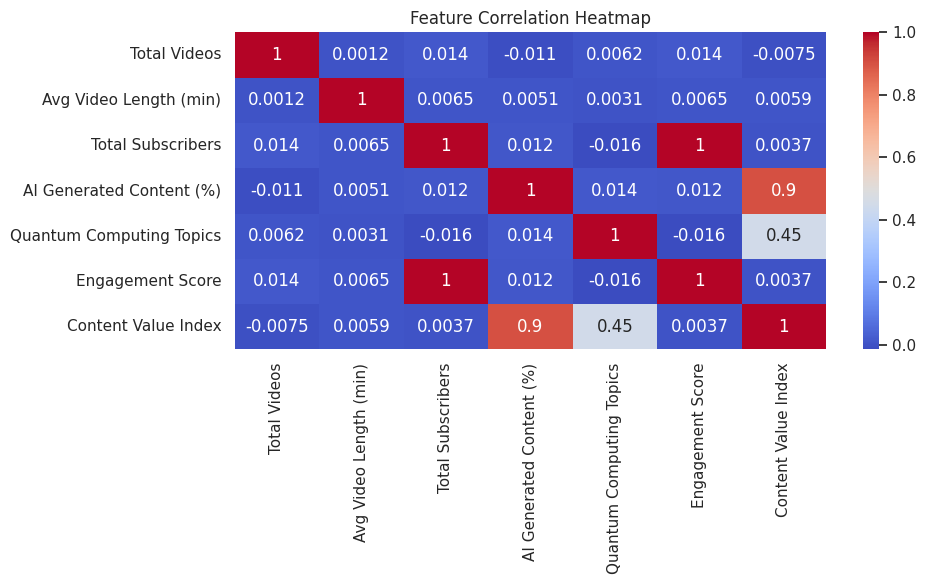

In [53]:
# Correlation Heatmap
numeric_cols = df.select_dtypes(include=['number']).drop(columns=['Members Count'])  # Optional: remove any categorical disguised as numeric
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

We can observe the Co-relation matrix and infer that Engangement Score and Total Subscribers have 100% corelation, whereas AI Generated Content and Content Value Index have 90% corelation

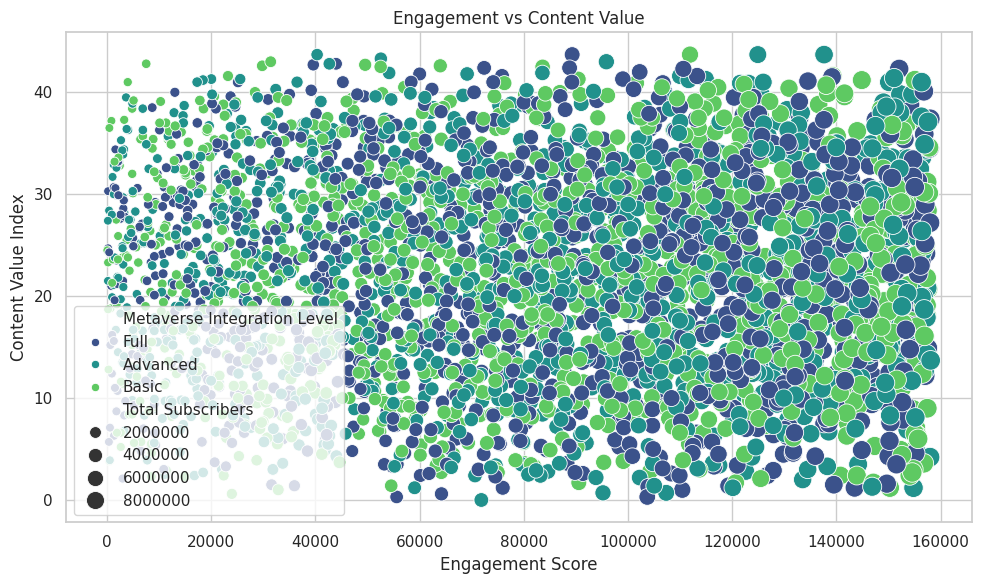

In [54]:
# Engagement Score vs Content Value Index
sns.scatterplot(data=df, x='Engagement Score', y='Content Value Index', hue='Metaverse Integration Level', size='Total Subscribers', palette='viridis', sizes=(40, 200))
plt.title("Engagement vs Content Value")
plt.tight_layout()
plt.show()

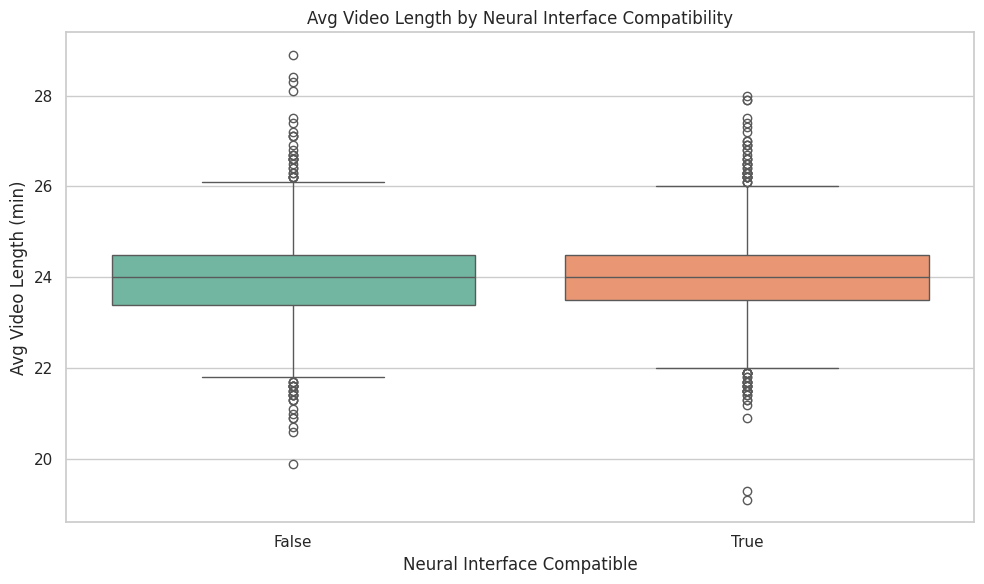

In [55]:
# Boxplot: Avg Video Length by Neural Interface Compatibility
sns.boxplot(data=df, x='Neural Interface Compatible', y='Avg Video Length (min)', palette='Set2')
plt.title("Avg Video Length by Neural Interface Compatibility")
plt.tight_layout()
plt.show()

## Predictive modeling

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [57]:
# Display non-numeric columns to debug
print("🕵️‍♂️ Non-numeric columns BEFORE encoding:\n", df.select_dtypes(include=['object', 'bool']).columns.tolist())

🕵️‍♂️ Non-numeric columns BEFORE encoding:
 ['Channel Name', 'Youtuber Name', 'Best Video', 'Neural Interface Compatible', 'Metaverse Integration Level', 'Holographic Content Rating']


In [58]:
# Label encode all object/bool columns
label_encoders = {}
for col in df.select_dtypes(include=['object', 'bool']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

In [59]:
# Display again to confirm fix
print("✅ All columns AFTER encoding:\n", df.dtypes)

✅ All columns AFTER encoding:
 Channel Name                     int64
Youtuber Name                    int64
Total Videos                     int64
Best Video                       int64
Avg Video Length (min)         float64
Total Subscribers                int64
Members Count                    int64
AI Generated Content (%)         int64
Neural Interface Compatible      int64
Metaverse Integration Level      int64
Quantum Computing Topics         int64
Holographic Content Rating       int64
Engagement Score               float64
Content Value Index            float64
dtype: object


In [60]:
# Target column
y = df['Content Value Index']


In [61]:
# Convert regression to classification (3 buckets: low, med, high)
y = pd.qcut(y, q=3, labels=[0, 1, 2])

In [62]:
# Features
X = df.drop(columns=['Content Value Index'])

In [63]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

In [65]:
# Train and evaluate
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracies[name] = acc * 100

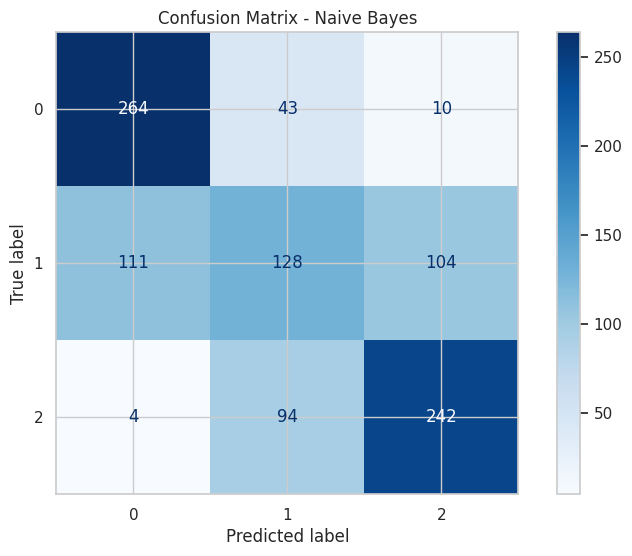

In [66]:
cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix - {name}")
plt.show()

In [67]:
# Final accuracy report
print("\n📊 Final Model Accuracies:")
for name, acc in sorted(accuracies.items(), key=lambda x: x[1], reverse=True):
    print(f"{name:25}: {acc:.2f}%")


📊 Final Model Accuracies:
Decision Tree            : 97.50%
Random Forest            : 96.00%
Logistic Regression      : 69.40%
Naive Bayes              : 63.40%
KNN                      : 34.00%
SVM                      : 31.50%


We can observe Decision Tree and Random Forest Classifier performing the best among all models.
